In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp

In [3]:
crop = pd.read_csv('Crop_recommendation.csv')
crop.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Crop_recommendation.csv'

In [3]:
crop.shape

(2200, 8)

In [4]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
crop.duplicated().sum()

0

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

In [8]:


# One-hot encode the 'label' column
crop_encoded = pd.get_dummies(crop, drop_first=True)

# Calculate correlation on the encoded dataset
corr = crop_encoded.corr()

# Display the correlation matrix
print(corr)


                          N         P         K  temperature  humidity  \
N                  1.000000 -0.231460 -0.140512     0.026504  0.190688   
P                 -0.231460  1.000000  0.736232    -0.127541 -0.118734   
K                 -0.140512  0.736232  1.000000    -0.160387  0.190859   
temperature        0.026504 -0.127541 -0.160387     1.000000  0.205320   
humidity           0.190688 -0.118734  0.190859     0.205320  1.000000   
ph                 0.096683 -0.138019 -0.169503    -0.017795 -0.008483   
rainfall           0.059020 -0.063839 -0.053461    -0.030084  0.094423   
label_banana       0.293714  0.189559  0.008192     0.075887  0.087021   
label_blackgram   -0.062268  0.093348 -0.124584     0.187808 -0.062384   
label_chickpea    -0.061854  0.095465  0.136917    -0.290667 -0.535491   
label_coconut     -0.168926 -0.241075 -0.075671     0.077313  0.229039   
label_coffee       0.299449 -0.162929 -0.078472    -0.003266 -0.123643   
label_cotton       0.397416 -0.047131 

In [9]:
# corr = crop.corr()

In [10]:
corr

,N,P,K,temperature,humidity,ph,rainfall,label_banana,label_blackgram,label_chickpea,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,0.293714,-0.062268,-0.061854,...,-0.180219,-0.172119,-0.174779,0.294246,-0.183116,-0.003972,-0.176316,-0.187313,0.173457,0.288925
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.189559,0.093348,0.095465,...,-0.173251,-0.035419,-0.040249,-0.235848,-0.243590,0.037633,0.095068,-0.229032,-0.038264,-0.240612
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.008192,-0.124584,0.136917,...,-0.078558,-0.120317,-0.121869,0.008321,-0.164361,0.008149,-0.120059,-0.034214,-0.035679,0.008925
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.075887,0.187808,-0.290667,...,0.241060,0.111151,0.125412,0.131330,-0.122869,0.349470,0.091618,-0.162864,-0.083057,-0.001055
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.087021,-0.062384,-0.535491,...,-0.209066,-0.179617,0.137430,0.204515,0.202823,0.205109,-0.229604,0.182777,0.105792,0.134101
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.136946,0.187396,0.244648,...,-0.198292,0.102006,0.071768,-0.031213,0.154401,0.076699,-0.190451,-0.011368,-0.012412,0.007417
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.004620,-0.141304,-0.092952,...,-0.034787,-0.207571,-0.218671,-0.312850,0.027845,0.155541,0.182665,0.016143,0.527088,-0.209209
label_banana,0.293714,0.189559,0.008192,0.075887,0.087021,-0.136946,0.004620,1.000000,-0.047619,-0.047619,...,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
label_blackgram,-0.062268,0.093348,-0.124584,0.187808,-0.062384,0.187396,-0.141304,-0.047619,1.000000,-0.047619,...,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
label_chickpea,-0.061854,0.095465,0.136917,-0.290667,-0.535491,0.244648,-0.092952,-0.047619,-0.047619,1.000000,...,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619


<Axes: >

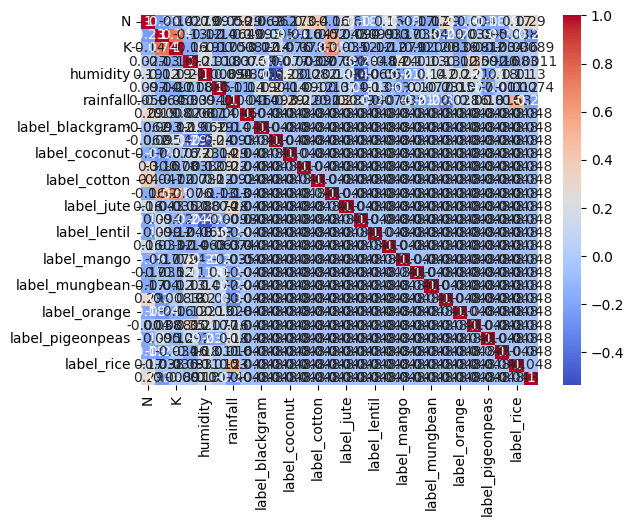

In [11]:
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm', fmt='.2g')

# Encoding

In [12]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [13]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['label_num'] = crop['label'].map(crop_dict)

In [14]:
crop.drop('label',axis=1,inplace=True)

In [15]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


# Train Test Split

In [16]:
# Split the dataset into features and labels
X = crop.iloc[:, :-1]
y = crop.iloc[:, -1]

In [17]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Scale the features using MinMaxScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standarization

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Models

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create instances of all models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),  # Default 5 neighbors
    'Support Vector Machine': SVC(probability=True, kernel='rbf'),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Artificial Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, solver='adam')
}

# Initialize a dictionary to store results
results = []

# Define cross-validation strategy
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through models, train, predict, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Cross-validation accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    
    print(f'\n{name}:\nAccuracy: {acc:.4f}')
    print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')
    
    # Display detailed classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Append results to the list
    results.append([name, acc, cv_scores.mean(), cv_scores.std()])



In [ ]:

# Convert results list to a DataFrame
import pandas as pd
df_results = pd.DataFrame(results, columns=["Model", "Test Accuracy", "Mean CV Accuracy", "CV Std Dev"])

# Display the final results table
print("\nFinal Model Performance Summary:\n")
print(df_results)

# Save results for paper inclusion
df_results.to_csv("model_performance_summary.csv", index=False)

# Predictive System

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

# Enhanced crop prediction function
def predict_crop(N, P, K, temperature, humidity, pH, rainfall, model):
    # Ensure input is in correct format
    try:
        input_values = np.array([[N, P, K, temperature, humidity, pH, rainfall]])
        
        # Make prediction
        prediction = model.predict(input_values)
        probabilities = model.predict_proba(input_values).max(axis=1)  # Get max probability

        # Crop mapping dictionary
        crop_mapping = {
            1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya",
            7: "Orange", 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes",
            12: "Mango", 13: "Banana", 14: "Pomegranate", 15: "Lentil", 16: "Blackgram",
            17: "Mungbean", 18: "Mothbeans", 19: "Pigeonpeas", 20: "Kidneybeans",
            21: "Chickpea", 22: "Coffee"
        }
        
        pred_crop = crop_mapping.get(prediction[0], "Unknown Crop")

        # Print result
        print(f"\n🌱 **Best Crop Recommendation:** {pred_crop}")
        print(f"🔹 Confidence Level: {probabilities[0]:.2%}")

        return pred_crop, probabilities[0]
    
    except Exception as e:
        print("⚠️ Error in processing input:", str(e))
        return None, None


In [22]:
predict_crop(90, 42, 43, 20, 80, 7, 200, rdf)

Rice is the best crop to be cultivated right there


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, class_labels):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    
    # Print classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_labels))

# Example usage (assuming y_test and y_pred are available)
class_labels = list(crop_mapping.values())
plot_confusion_matrix(y_test, y_pred, class_labels)


In [ ]:
# Function to plot ROC curve for multiple classifiers
def plot_roc_curve(models, X_test, y_test, n_classes):
    plt.figure(figsize=(10, 7))
    
    for name, model in models.items():
        if hasattr(model, "predict_proba"):  # Check if model supports probability prediction
            y_prob = model.predict_proba(X_test)
            for i in range(n_classes):
                fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'{name} (Class {i+1}, AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Crop Classification")
    plt.legend()
    plt.show()

# Example usage:
n_classes = len(crop_mapping)  # Number of crop categories
plot_roc_curve(models, X_test, y_test, n_classes)
